In [59]:
import os
import re
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from thon.churn_functions import plot_eval, bake, modernize

Add appts, home sales?, and more stocks?

In [20]:
data = pd.read_csv("./data/out/features.csv")
len(data), len(data.columns)

(150, 75)

In [64]:
X, y = data.drop(columns = ['n']), data['n']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, shuffle = False)

AttributeError: 'DataFrame' object has no attribute '_reset'

In [23]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])
# use pipeline for all in future

In [29]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.5, 10, 0.1)},
                      cv = 5,
                      scoring = 'neg_root_mean_squared_error',
                      verbose = 0)

In [30]:
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])},
             scoring='neg_root_mean_squared_error')

In [31]:
search.best_params_

{'model__alpha': 1.0999999999999999}

In [32]:
coef = search.best_estimator_[1].coef_

Trim unneeded features

In [33]:
f_train = X_train[X_train.columns[coef >  0]]
f_test = X_test[X_test.columns[coef >  0]]

In [34]:
model = pipeline.fit(f_train, y_train)

135

In [11]:
pred_train = pd.Series(model.predict(f_train), index = f_train.index)
pred_test = pd.Series(model.predict(f_test), index = f_test.index)

1853.6182710327575
13.730505711353759


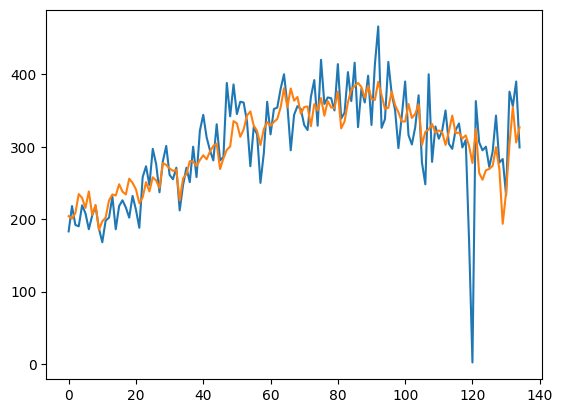

In [12]:
plot_eval(pred_train, y_train)

2910.5634609676786
194.0375640645119


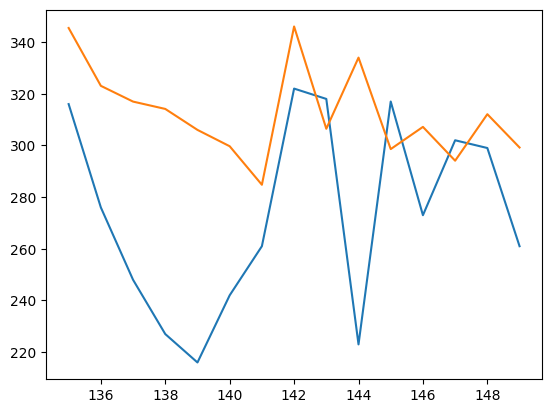

In [13]:
plot_eval(pred_test, y_test)

In [14]:
f_new = modernize(f_train.columns)

In [15]:
pred = pd.Series(model.predict(f_new))

In [16]:
out = bake(y_train, y_test, pred_train, pred_test, pred)

In [17]:
out.to_csv("./data/out/lasso.csv")

,pred,actual,group
0,183.000000,204.123554,train
1,218.000000,200.665536,train
2,192.000000,208.314041,train
3,190.000000,234.611092,train
4,219.000000,229.287444,train
...,...,...,...
148,299.000000,312.090387,test
149,261.000000,299.201833,test
150,309.588797,NaN,pred
151,310.635722,NaN,pred
